**Clustering**

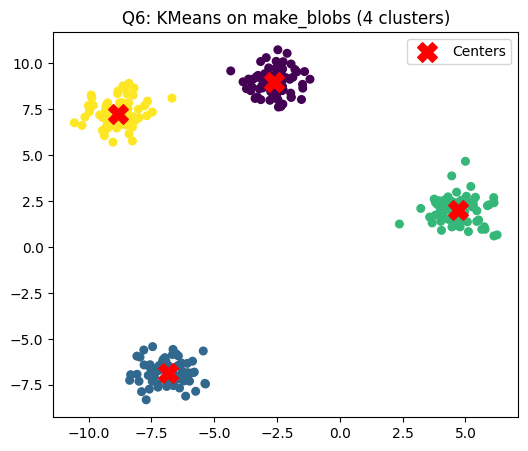

Q7: Number of clusters found (excluding noise): 0


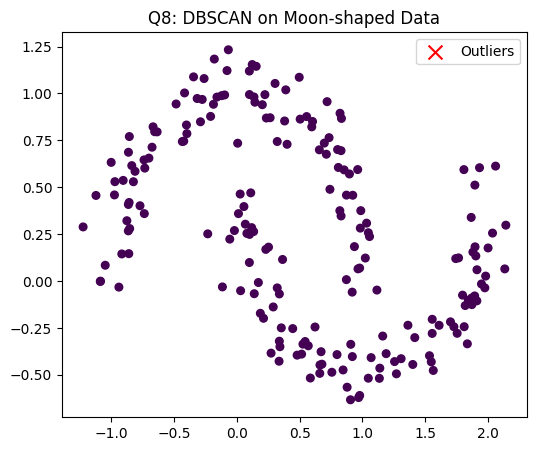

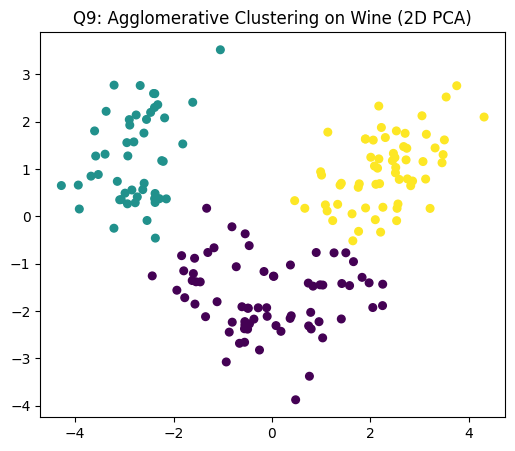

Q10: Synthetic customer segmentation done with KMeans (5 clusters).
Cluster centers (scaled):
 [[-0.33685393  1.44384826  1.65631526  0.04869045]
 [ 1.54950659 -0.97167476 -0.38220625 -1.2753533 ]
 [ 0.63887366  0.65196891 -0.9664542   1.25060983]
 [-1.23029803 -1.18607278 -0.84635415  0.90308612]
 [-0.62122829  0.06193036  0.53869934 -0.92703309]]


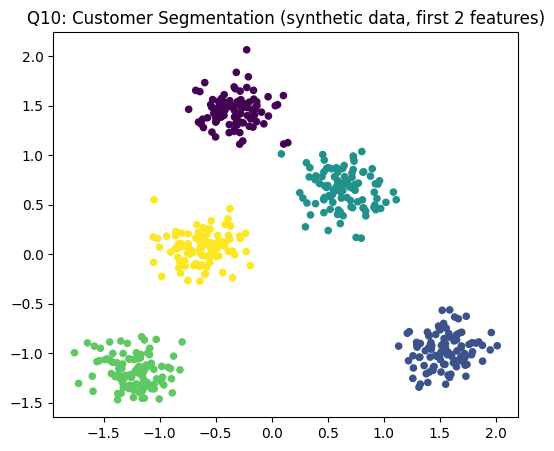

In [1]:
# =======================================
# Q1. Difference between K-Means and Hierarchical Clustering + Use Case
# =======================================
# - K-Means:
#   * Partitional clustering; divides data into k clusters by minimizing within-cluster variance.
#   * Needs number of clusters (k) as input.
#   * Efficient for large datasets.
#   * Use case: Customer segmentation in large e-commerce datasets.
#
# - Hierarchical Clustering:
#   * Builds nested clusters using agglomerative (bottom-up) or divisive (top-down) approach.
#   * Does not require k in advance (can cut dendrogram later).
#   * Use case: Small datasets needing interpretability, e.g., gene expression analysis.

# =======================================
# Q2. Purpose of Silhouette Score
# =======================================
# - Measures how well a data point fits within its cluster compared to other clusters.
# - Ranges: -1 (bad) → +1 (good).
# - High silhouette score = clusters are well-separated and cohesive.
# - Used to evaluate clustering performance without ground truth.

# =======================================
# Q3. Core Parameters of DBSCAN
# =======================================
# - eps (ε): Neighborhood radius. Points within this distance are considered neighbors.
# - min_samples: Minimum number of neighbors (including the point itself) required to form a dense region (core point).
# - Influence:
#   * Small eps → many small clusters, more noise.
#   * Large eps → fewer clusters, risk of merging distinct groups.
#   * Larger min_samples → denser clusters required.

# =======================================
# Q4. Why Feature Scaling is Important
# =======================================
# - Distance-based algorithms (KMeans, DBSCAN) rely on Euclidean or similar distances.
# - Features with larger ranges dominate distance computations.
# - Scaling (StandardScaler, MinMaxScaler) ensures equal contribution of all features.

# =======================================
# Q5. Elbow Method in KMeans
# =======================================
# - Plots Within-Cluster Sum of Squares (WCSS) vs. number of clusters (k).
# - As k increases, WCSS decreases; the "elbow point" (sharp bend) suggests optimal k.
# - Helps avoid under/over-segmentation.

# =======================================
# Q6. KMeans on make_blobs data
# =======================================
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.7)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200, label="Centers")
plt.title("Q6: KMeans on make_blobs (4 clusters)")
plt.legend()
plt.show()

# =======================================
# Q7. DBSCAN on Wine dataset
# =======================================
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

wine = load_wine()
Xw = wine.data
scaler = StandardScaler()
Xw_scaled = scaler.fit_transform(Xw)

db = DBSCAN(eps=1.5, min_samples=5)
labels_w = db.fit_predict(Xw_scaled)
n_clusters = len(set(labels_w)) - (1 if -1 in labels_w else 0)
print("Q7: Number of clusters found (excluding noise):", n_clusters)

# =======================================
# Q8. DBSCAN on moon-shaped data
# =======================================
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=200, noise=0.1, random_state=42)
db_m = DBSCAN(eps=0.3, min_samples=5)
labels_m = db_m.fit_predict(Xm)

plt.figure(figsize=(6,5))
plt.scatter(Xm[:,0], Xm[:,1], c=labels_m, cmap='viridis', s=30)
# Highlight outliers (-1 label)
outliers = (labels_m == -1)
plt.scatter(Xm[outliers,0], Xm[outliers,1], c='red', marker='x', s=100, label="Outliers")
plt.title("Q8: DBSCAN on Moon-shaped Data")
plt.legend()
plt.show()

# =======================================
# Q9. Agglomerative Clustering on Wine dataset (PCA → 2D)
# =======================================
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2, random_state=42)
Xw_pca = pca.fit_transform(Xw_scaled)

agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(Xw_pca)

plt.figure(figsize=(6,5))
plt.scatter(Xw_pca[:,0], Xw_pca[:,1], c=labels_agg, cmap='viridis', s=30)
plt.title("Q9: Agglomerative Clustering on Wine (2D PCA)")
plt.show()

# =======================================
# Q10. Real-world Workflow: Customer Segmentation
# =======================================
# Business Case: Segment customers based on purchase behavior.

# Workflow:
# 1. Data Preprocessing:
#    - Handle missing values (impute with mean/median or drop).
#    - Scale features (StandardScaler/MinMaxScaler).
#    - Encode categorical variables (OneHotEncoder).
#
# 2. Algorithm choice:
#    - KMeans: scalable, interpretable, works well if clusters are spherical.
#    - DBSCAN: good for detecting arbitrary-shaped clusters & outliers.
#    - Hierarchical: if interpretability & dendrogram insights are important.
#
# 3. Determine number of clusters:
#    - Use Elbow method, Silhouette Score, Gap Statistics.
#
# 4. Evaluation:
#    - Check cluster stability & business meaning (profiling clusters).
#
# 5. Marketing benefit:
#    - Targeted campaigns: e.g., premium vs. discount customers.
#    - Personalized recommendations.
#    - Better customer retention & cross-selling.

# Example Demo (synthetic customer data)
from sklearn.datasets import make_blobs

Xc, _ = make_blobs(n_samples=500, centers=5, n_features=4, random_state=42)
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)

kmeans_cust = KMeans(n_clusters=5, random_state=42)
labels_cust = kmeans_cust.fit_predict(Xc_scaled)

print("Q10: Synthetic customer segmentation done with KMeans (5 clusters).")
print("Cluster centers (scaled):\n", kmeans_cust.cluster_centers_)

# Visualize first 2 features
plt.figure(figsize=(6,5))
plt.scatter(Xc_scaled[:,0], Xc_scaled[:,1], c=labels_cust, cmap='viridis', s=20)
plt.title("Q10: Customer Segmentation (synthetic data, first 2 features)")
plt.show()


